آشنایی با ساختار فایل‌
فایل اصلی: ca-HepTh.txt.gz
این فایل شامل لبه‌های گراف (یعنی همکاری بین نویسندگان) هست.
فرمت هر خط:
source_node_id  target_node_id  [timestamp]
اما برای تحلیل ساختار شبکه، ما معمولاً فقط source و target رو نیاز داریم.

خواندن فایل ca-HepTh.txt.gz و ساخت گراف

In [1]:
import networkx as nx
import gzip

# ساخت گراف بدون جهت (چون همکاری بین دو نفر دوطرفه‌ست)
G = nx.Graph()

path = 'data/ca-HepTh/ca-HepTh.txt.gz'

with gzip.open(path, 'rt') as f:
    for line in f:
        if line.startswith('#'):  # رد کردن خط‌های کامنت
            continue
        u, v, *_ = line.strip().split()
        G.add_edge(int(u), int(v))

print(f"تعداد گره‌ها: {G.number_of_nodes()}")
print(f"تعداد یال‌ها: {G.number_of_edges()}")


تعداد گره‌ها: 9877
تعداد یال‌ها: 25998


محاسبه مشخصات گراف

In [2]:
# فقط کامپوننت بزرگ را در نظر می‌گیریم
if not nx.is_connected(G):
    G = G.subgraph(max(nx.connected_components(G), key=len)).copy()

degrees = dict(G.degree())
max_degree = max(degrees.values())
avg_degree = sum(degrees.values()) / G.number_of_nodes()
avg_path_length = nx.average_shortest_path_length(G)
diameter = nx.diameter(G)
avg_clustering = nx.average_clustering(G)

print("الف) مشخصات شبکه:")
print(f"- ماکزیمم درجه: {max_degree}")
print(f"- متوسط درجه: {avg_degree:.2f}")
print(f"- متوسط فاصله: {avg_path_length:.2f}")
print(f"- قطر شبکه: {diameter}")
print(f"- متوسط ضریب خوشه‌بندی: {avg_clustering:.4f}")

الف) مشخصات شبکه:
- ماکزیمم درجه: 65
- متوسط درجه: 5.75
- متوسط فاصله: 5.95
- قطر شبکه: 18
- متوسط ضریب خوشه‌بندی: 0.4816


رسم نمودار توزیع درجه

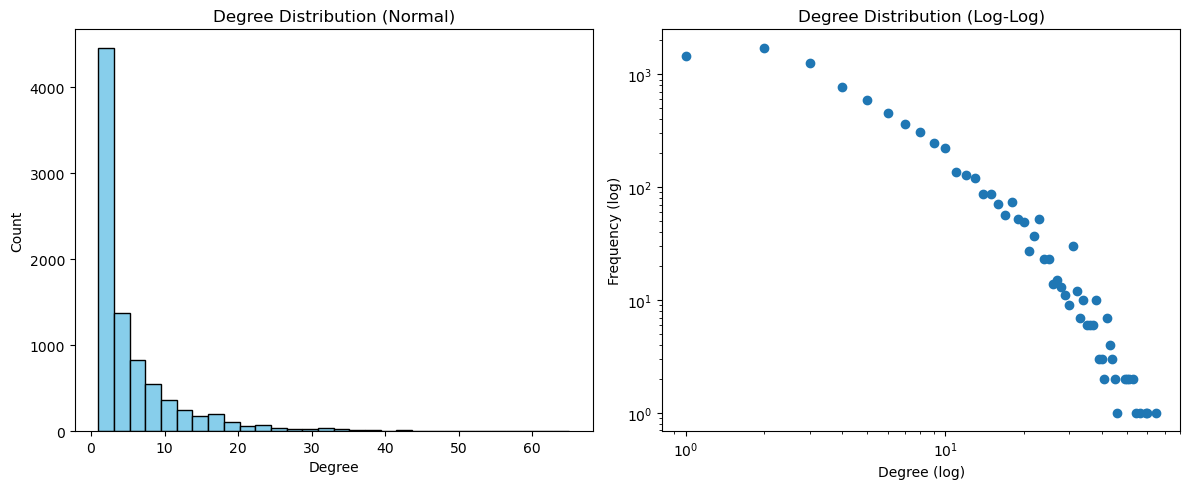

In [5]:
import matplotlib.pyplot as plt
import numpy as np

degree_values = list(degrees.values())

# نمودار هیستوگرام عادی
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(degree_values, bins=30, color='skyblue', edgecolor='black')
plt.title("Degree Distribution (Normal)")
plt.xlabel("Degree")
plt.ylabel("Count")

# log-log plot
plt.subplot(1, 2, 2)
degree_count = np.bincount(degree_values)
degrees_list = np.arange(len(degree_count))
plt.loglog(degrees_list[degree_count > 0], degree_count[degree_count > 0], marker='o', linestyle='None')
plt.title("Degree Distribution (Log-Log)")
plt.xlabel("Degree (log)")
plt.ylabel("Frequency (log)")

plt.tight_layout()
plt.show()


تحلیل 5 گره با بیشترین درجه

In [4]:
top_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nج) 5 گره با بیشترین درجه:")
for node, deg in top_nodes:
    clust = nx.clustering(G, node)
    print(f"گره {node} -> درجه: {deg}, ضریب خوشه‌بندی: {clust:.4f}")



ج) 5 گره با بیشترین درجه:
گره 1441 -> درجه: 65, ضریب خوشه‌بندی: 0.0635
گره 19615 -> درجه: 60, ضریب خوشه‌بندی: 0.0661
گره 63113 -> درجه: 59, ضریب خوشه‌بندی: 0.0795
گره 30744 -> درجه: 56, ضریب خوشه‌بندی: 0.0506
گره 16164 -> درجه: 54, ضریب خوشه‌بندی: 0.0985
